# Data Science and Business Analytics Intern @The Sparks Foundation

# Name: MADHURA DAS

# TASK 1:Prediction Using Supervised ML(Level-Beginner)

### Predict the percentage of an student based on the no. of study hours.What will be the predict score if a student studies for 9.25hrs/day?

In [2]:
import numpy as np
import pandas as pd

#import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt


In [3]:
#importing data from given link
data=pd.read_csv("http://bit.ly/w-data")

In [4]:
#checking 1st 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Statistical summary of the data
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [7]:
#Checking whether the data  is having null value or not
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

Text(0,0.5,'Percentange Score')

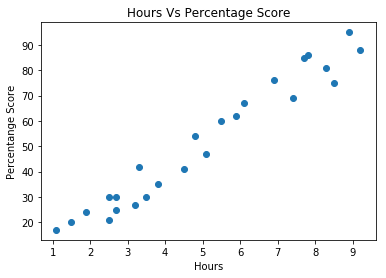

In [8]:
plt.scatter("Hours","Scores",data=data)
plt.title("Hours Vs Percentage Score")
plt.xlabel("Hours")
plt.ylabel("Percentange Score")

# Spilitting Data into train and test data

In [31]:
# Reshaping the Hours and Scores column into array
X=data.iloc[:,:-1].values

Y=data.iloc[:,1].values

In [32]:
print(X.shape,Y.shape)

(25, 1) (25,)


##### We have our attributes and labels,next is to split this data into training and test sets.We'll do this by using Scikit-Learner's built-in train_test_split() method:

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [34]:
print(X_train.shape,Y_train.shape)



(20, 1) (20,)


In [35]:
print(X_test.shape,Y_test.shape)

(5, 1) (5,)


### Plot Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

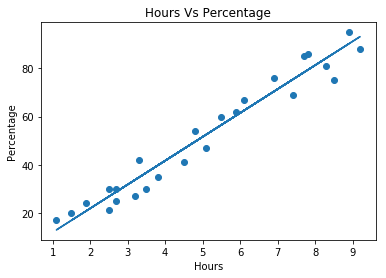

In [37]:
#plotting the regression line

line=regression.coef_*X+regression.intercept_
#plotting for the test data

plt.scatter(X,Y)
plt.plot(X,line)
plt.title("Hours Vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

### Making Predictions

#### We have plot the linear regression,time to make some predictions


In [38]:
#predicting the scores
Y_predictions=regression.predict(X_test)

In [39]:
#comparing actual vs predicted
pd.DataFrame({'Actual':Y_test,'Predicted':Y_predictions})

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicted Score if a student studies for 9.25hrs/day


In [40]:
print("The predicted score is {} if a student studies for 9.25hrs/day".format(regression.predict([[9.25]])[0]))

The predicted score is 93.69173248737538 if a student studies for 9.25hrs/day


# Mean Square Error

In [42]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(Y_test,Y_predictions))

Mean Absolute Error: 4.183859899002975
